<div style="float: right; margin: 20px 20px 20px 20px"><img src="images/bro.png" width="100px"></div>

# Zeek Network Data to Plotting
Yes, this is provincial, but going from a Zeek log to a visual data plot in a few lines of code might be really handy sometimes. So without further ado here's a very small bit of code :)

<div style="float: right; margin: 30px -100px 0px 0px"><img src="images/matplotlib.png" width="300px"></div>

### Software
- Zeek Analysis Tools (ZAT): https://github.com/SuperCowPowers/zat
- Pandas: https://github.com/pandas-dev/pandas
- Matplotlib: https://matplotlib.org

## Quickly go from Zeek log to Pandas DataFrame

In [1]:
from zat.log_to_dataframe import LogToDataFrame
from zat.utils import plot_utils

# Just some plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plot_utils.plot_defaults()

# Convert it to a Pandas DataFrame
log_to_df = LogToDataFrame()
http_df = log_to_df.create_dataframe('http.log')
http_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,info_msg,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types
ts,,,,,,,,,,,,,,,,,,,,,
2013-09-15 23:44:27.668081999,CyIaMO7IheOh38Zsi,192.168.33.10,1031,54.245.228.191,80,1,GET,guyspy.com,/,NaN,...,NaN,NaN,(empty),NaN,NaN,NaN,NaN,NaN,Fnjq3r4R0VGmHVWiN5,text/html
2013-09-15 23:44:27.731701851,CoyZrY2g74UvMMgp4a,192.168.33.10,1032,54.245.228.191,80,1,GET,www.guyspy.com,/,NaN,...,NaN,NaN,(empty),NaN,NaN,NaN,NaN,NaN,FCQ5aX37YzsjAKpcv8,text/html
2013-09-15 23:44:28.092921972,CoyZrY2g74UvMMgp4a,192.168.33.10,1032,54.245.228.191,80,2,GET,www.guyspy.com,/wp-content/plugins/slider-pro/css/advanced-sl...,http://www.guyspy.com/,...,NaN,NaN,(empty),NaN,NaN,NaN,NaN,NaN,FD9Xu815Hwui3sniSf,text/html
2013-09-15 23:44:28.150300980,CiCKTz4e0fkYYazBS3,192.168.33.10,1040,54.245.228.191,80,1,GET,www.guyspy.com,/wp-content/plugins/contact-form-7/includes/cs...,http://www.guyspy.com/,...,NaN,NaN,(empty),NaN,NaN,NaN,NaN,NaN,FMZXWm1yCdsCAU3K9d,text/plain
2013-09-15 23:44:28.150601864,C1YBkC1uuO9bzndRvh,192.168.33.10,1041,54.245.228.191,80,1,GET,www.guyspy.com,/wp-content/plugins/slider-pro/css/slider/adva...,http://www.guyspy.com/,...,NaN,NaN,(empty),NaN,NaN,NaN,NaN,NaN,FA4NM039Rf9Y8Sn2Rh,text/plain


<div style="float: left; margin: 20px 20px 20px 20px"><img src="images/eyeball.jpeg" width="100px"></div>

## Lets look at our data
Above we used a ZAT utility method to set up nice plotting defaults and here we simply use the plotting provided by Pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93a16d9210>,
      dtype=object)

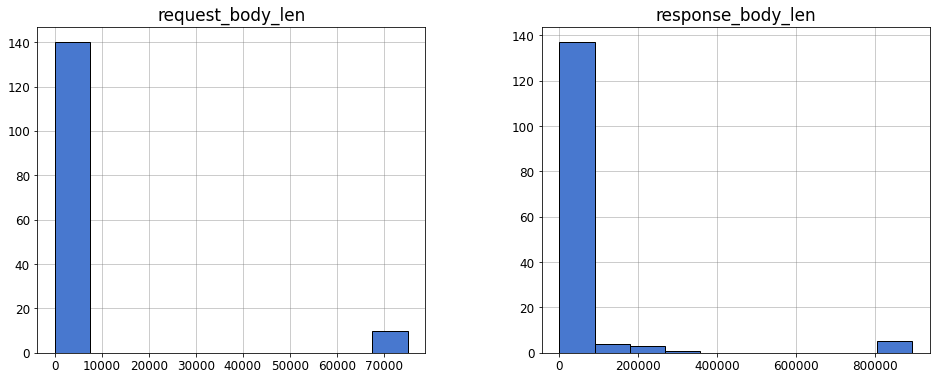

In [2]:
http_df[['request_body_len','response_body_len']].hist()

<div style="float: left; margin: 20px 20px 20px 20px"><img src="images/eyeball.jpeg" width="100px"></div>

## Lets look at our data again
Since ZAT automatically makes the timestamp the index, we can plot volume over time super easy.

Text(0.5, 0, 'HTTP Requests per Second')

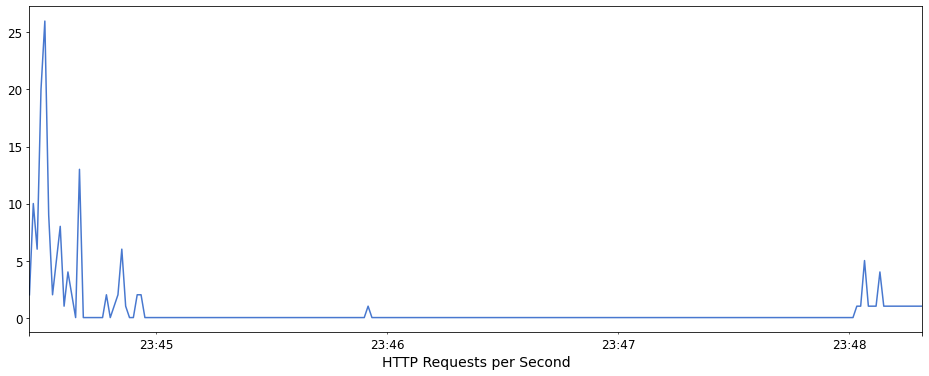

In [3]:
http_df['uid'].resample('1S').count().plot()
plt.xlabel('HTTP Requests per Second')

## Wrap Up
Well that's it for this notebook, it was kinda simple but sometime you just want to know how to plot the darn thing. :)

If you liked this notebook please visit the [ZAT](https://github.com/SuperCowPowers/zat) project for more notebooks and examples.